## Classification - Ensemble Learning

The following tutorial contains Python examples for solving classification problems. You should refer to the Slides Week 9 to understand some concepts introduced in this tutorial.

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
1. To provide examples of using different ensemble learning techniques from the scikit-learn library package.
2. To make a model performance comparison.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## Hold-out Data preparation

In [1]:
from sklearn.model_selection import train_test_split # this function provides a single "Hold-Out" Validation.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #similar to MAE, we use accuracy_score evaluation metric.
import pandas as pd
import numpy as np

data = pd.read_csv('Credit_approval.csv',header='infer')
data.head(5)

,Age,Debt,YearsEmployed,CreditScore,Income,Approved
0,30.83,0.000,1.25,1,0,+
1,58.67,4.460,3.04,6,560,+
2,24.50,0.500,1.50,0,824,+
3,27.83,1.540,3.75,5,3,+
4,20.17,5.625,1.71,0,0,+


In [2]:
Y = data['Approved'] #this is our prediction target
X = data.drop(['Approved'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
# From original dataset, 0.4 (40%) is used for testing (validation). random_state ensures random split is fixed.

## 0. Decision Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # number estimators is the key parameter
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.751232
Validation accuracy is 0.727941


## 1. Random Forest 

In [4]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1) #because the model has random sampling, a random seed can ensure repeated results.
clf = RandomForestClassifier(max_depth=2,n_estimators=500)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.780788
Validation accuracy is 0.761029


## 2. Bagging

In [5]:
from sklearn.ensemble import BaggingClassifier
np.random.seed(1)
clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50) # number estimators is the key parameter
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.778325
Validation accuracy is 0.735294


## 3. AdaBoost

In [6]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(1)
clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=5) # number estimators is the key parameter
clf3 = clf3.fit(X_train, Y_train)
Y_predTrain = clf3.predict(X_train)
Y_predTest = clf3.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.805419
Validation accuracy is 0.779412


## Model Comparison 

[[ 70  47]
 [ 18 137]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


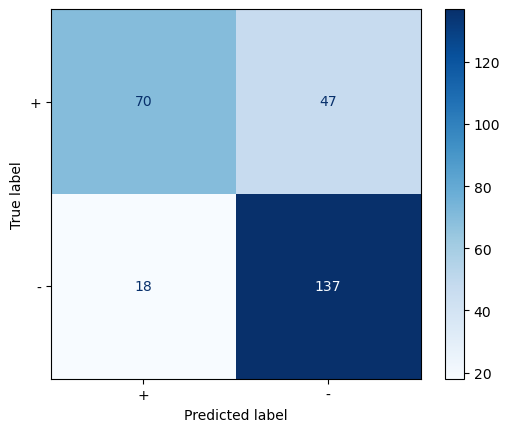

In [7]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
disp = plot_confusion_matrix(clf, X_test, Y_test,display_labels=['+','-'],values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)
print(disp.confusion_matrix)

## 4. Class-weight method for imbalanced classification.

Counter({1: 9000, 0: 1000})


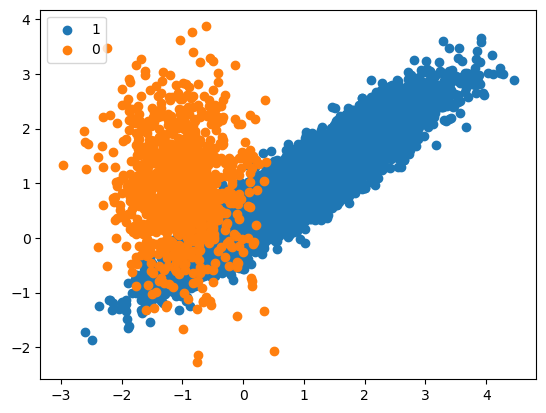

In [8]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
# define dataset
np.random.seed(1)
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.1], flip_y=0, random_state=2) 
#randomly generate an imbalanced 2-dimensional binary set

counter = Counter(y)
print(counter) #count how many 1 and how many 0

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

[[ 262  124]
 [   8 3606]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


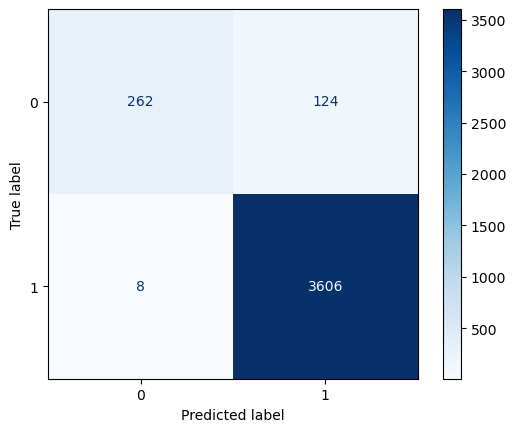

In [9]:
clf=DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
disp = plot_confusion_matrix(clf, X_test, Y_test,display_labels=['0','1'],values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)
print(disp.confusion_matrix) #direct implementation. the number of 0 labels that were misclassified as 1 is high

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 376   10]
 [ 532 3082]]


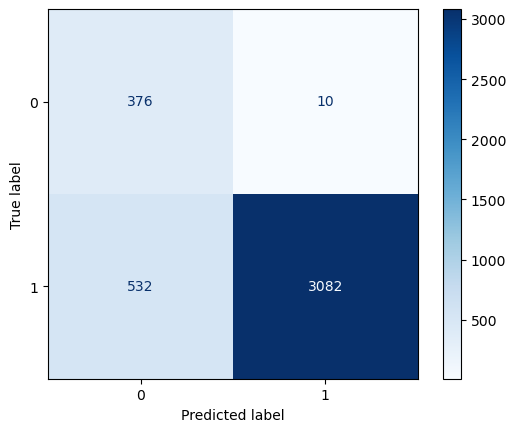

In [10]:
weights = {0:10.0, 1:1.0} #the weight put the weight for class "0" to 10 and "1" to 1. So the "0" class is more important
clf = DecisionTreeClassifier(max_depth=2,class_weight=weights)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
disp = plot_confusion_matrix(clf, X_test, Y_test,display_labels=['0','1'],values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)
print(disp.confusion_matrix)

## Summary

### 1. Learn how to build Ensemble Learning Methods
### 2. Learn how to import different classfiers. Please go to the Sklearn website for more details if you want to study more. https://scikit-learn.org/stable/auto_examples/index.html#classification
### 3. Learn how to compute the confusion matrix
### 4. Learn how to compute the class-sensitive classification

# Week 9 - Assignment. Due. Week 10

### 1.  Plot confusion matrix of the FOUR classifiers and calculate the accuracy, precision, recall, F-score of these classifiers using the confusion matrix (30 points)

### 2.  Illustrate the differences between these classifiers and compare the model performances. (30 points)

### 3.  Use the credictcard-reduced.csv dataset ([Data description](https://www.kaggle.com/mlg-ulb/creditcardfraud)) and build Five classification models. Please evaluate your model performance (40 points). A list of classification models can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)



### 4.  Bonus credits (extra 1/100 points to Final GPA calculation):

Learn from the documentation for [imbalanced classification](https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples) and use any of the sampling methods to deal with the credictcard-reduced.csv dataset. Evaluate model performance.